In [1]:
import reader
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading the dataset

In [3]:
data=reader.get_all_data()
data.head()

,Property Crime,Violent Crime,Total Crime,Log Property Crime,Log Violent Crime,Log Total Crime,Root Log Property Crime,Root Log Violent Crime,Root Log Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),High Bracket Income (Household),Percent High School Dropouts,Percent No Degree,Percent Any Degree
Area_name,,,,,,,,,,,,,,,,,
"Abbeville, SC",307.60,52.200000,359.800000,5.726519,3.947929,5.883548,2.392973,1.986704,2.425568,41.909,33.495,16.772,34.711517,-60.230000,23.1,40.358297,59.641703
"Acadia, LA",569.25,45.000000,614.250000,6.325446,3.508493,6.397210,2.514729,1.863192,2.528887,47.311,33.882,17.704,43.257999,284.213930,31.7,32.914498,67.085502
"Accomack, VA",536.40,70.000000,606.400000,6.278231,4.240628,6.401470,2.505531,2.059051,2.530016,53.054,40.343,22.013,53.847933,358.326667,23.7,35.937033,64.062967
"Ada, ID",1079.00,159.333333,1238.333333,6.975716,5.069689,7.114709,2.641048,2.251568,2.667251,71.190,55.888,27.805,61.384253,318.592294,7.5,47.240193,52.759807
"Adair, IA",44.20,4.600000,48.800000,3.770116,1.315850,3.875377,1.941027,1.019475,1.968178,52.090,43.487,22.897,42.852780,249.226415,7.8,29.580117,70.419883


### Data Visualization

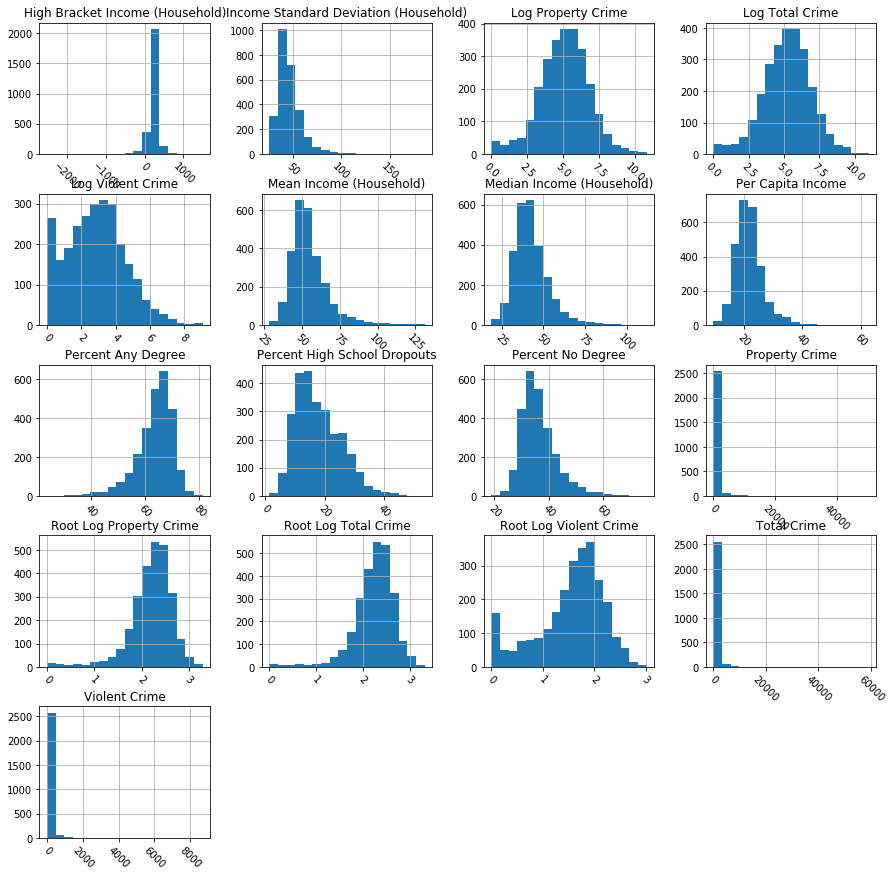

In [54]:
data.hist(figsize=(15,15), xrot=-45, bins=18)
plt.show()

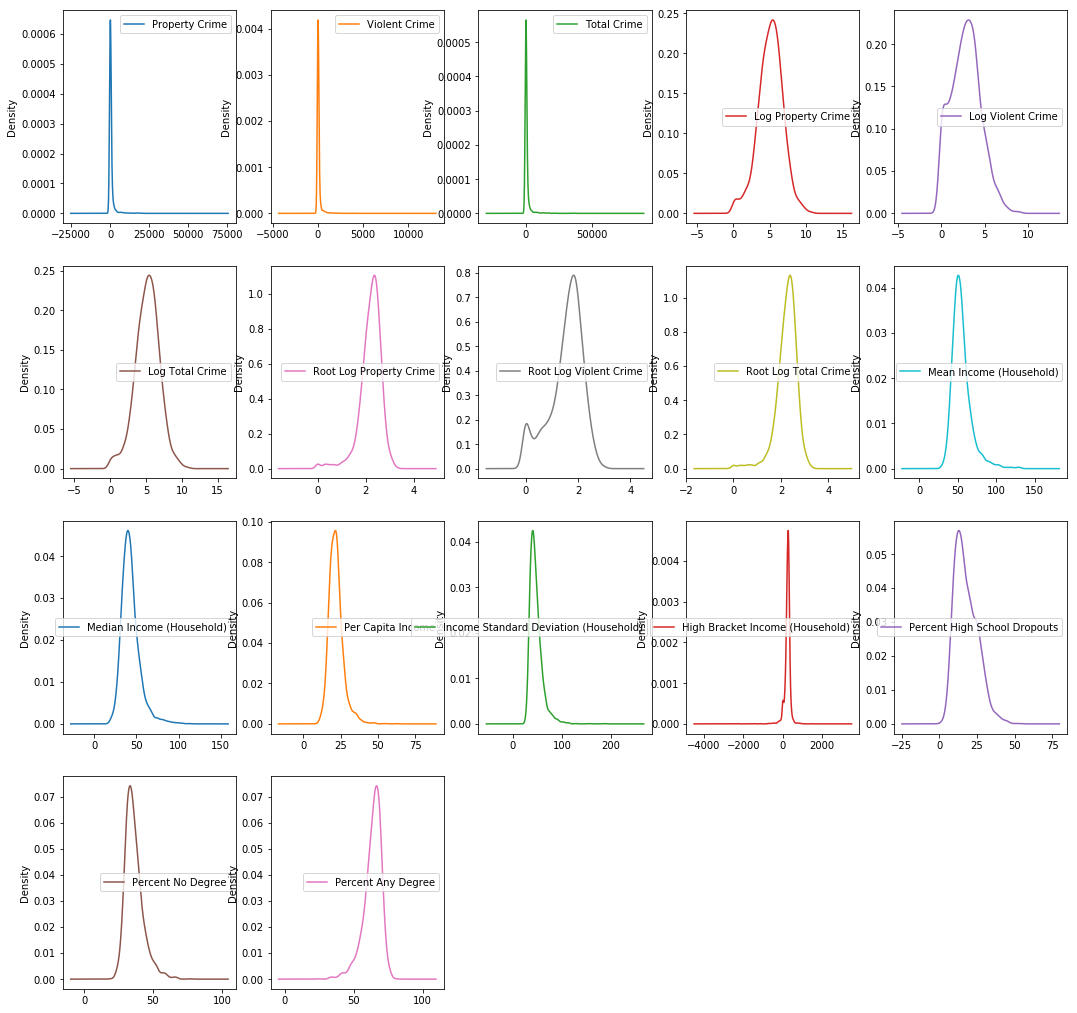

In [53]:
data.plot(kind='density', subplots=True, layout=(4,5), sharex=False, figsize=(18,18))
plt.show()

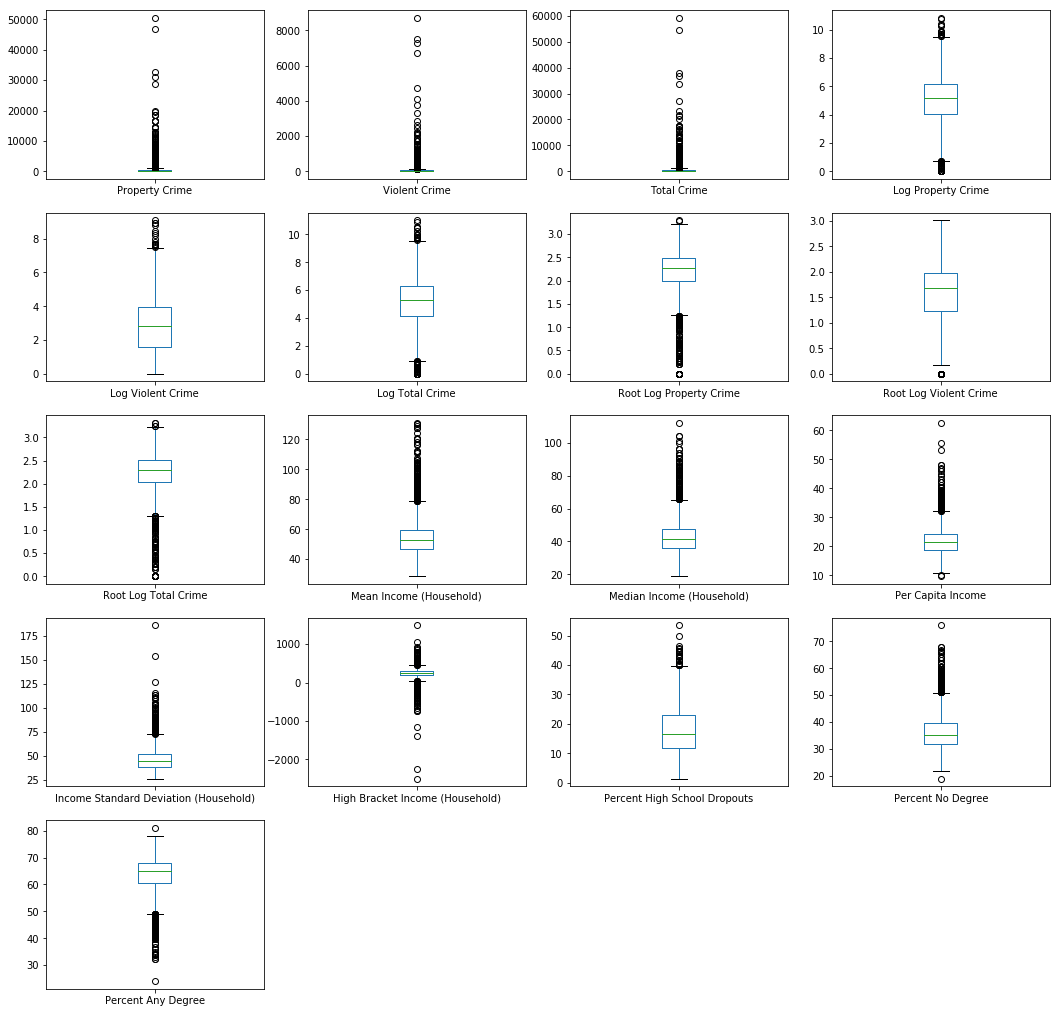

In [55]:
data.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,18))
plt.show()

#### Finding correlation between all the features

In [7]:
corrmat = data.corr() 
corrmat

,Property Crime,Violent Crime,Total Crime,Log Property Crime,Log Violent Crime,Log Total Crime,Root Log Property Crime,Root Log Violent Crime,Root Log Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),High Bracket Income (Household),Percent High School Dropouts,Percent No Degree,Percent Any Degree
Property Crime,1.000000,0.921718,0.998446,0.472400,0.497399,0.479982,0.355846,0.360401,0.370593,0.306694,0.256655,0.255442,0.271039,0.092395,-0.071649,0.292814,-0.292814
Violent Crime,0.921718,1.000000,0.941670,0.390716,0.455656,0.402571,0.291044,0.321516,0.307764,0.216137,0.164843,0.171605,0.217827,0.077526,-0.027148,0.216133,-0.216133
Total Crime,0.998446,0.941670,1.000000,0.465252,0.496258,0.473675,0.350005,0.358353,0.365297,0.296493,0.245838,0.245820,0.265856,0.091153,-0.066103,0.284417,-0.284417
Log Property Crime,0.472400,0.390716,0.465252,1.000000,0.886643,0.996929,0.962347,0.864674,0.961606,0.324589,0.292013,0.221686,0.242601,0.137109,-0.048057,0.335215,-0.335215
Log Violent Crime,0.497399,0.455656,0.496258,0.886643,1.000000,0.908193,0.803018,0.954505,0.831559,0.307820,0.256309,0.193703,0.264398,0.141807,0.011014,0.346958,-0.346958
Log Total Crime,0.479982,0.402571,0.473675,0.996929,0.908193,1.000000,0.957288,0.887070,0.965244,0.326040,0.292172,0.220598,0.246007,0.138383,-0.043297,0.339297,-0.339297
Root Log Property Crime,0.355846,0.291044,0.350005,0.962347,0.803018,0.957288,1.000000,0.827356,0.991609,0.244611,0.226146,0.150963,0.169795,0.105573,-0.024832,0.255598,-0.255598
Root Log Violent Crime,0.360401,0.321516,0.358353,0.864674,0.954505,0.887070,0.827356,1.000000,0.857892,0.253301,0.217504,0.138059,0.206472,0.126284,0.020580,0.295397,-0.295397
Root Log Total Crime,0.370593,0.307764,0.365297,0.961606,0.831559,0.965244,0.991609,0.857892,1.000000,0.255848,0.235294,0.158422,0.180211,0.109580,-0.022908,0.269933,-0.269933
Mean Income (Household),0.306694,0.216137,0.296493,0.324589,0.307820,0.326040,0.244611,0.253301,0.255848,1.000000,0.950084,0.923479,0.775647,0.305478,-0.537486,0.671140,-0.671140


#### Plotting the correlation between various features

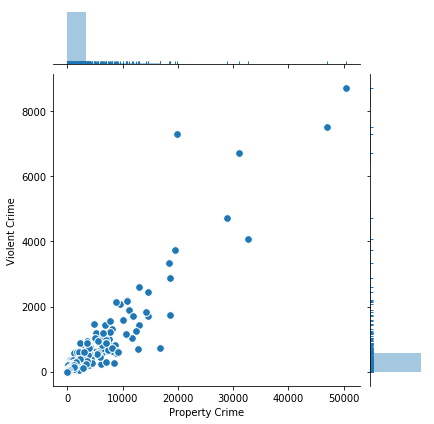

In [8]:
sns.jointplot(x=data['Property Crime'], y=data['Violent Crime'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

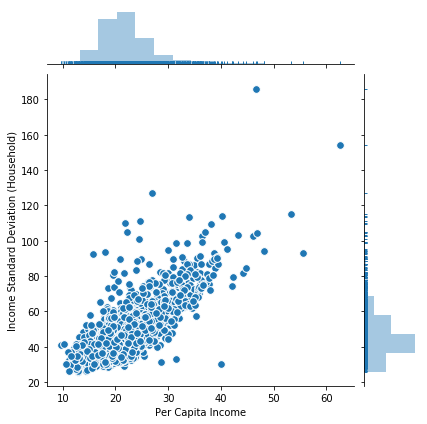

In [9]:
sns.jointplot(x=data['Per Capita Income'], y=data['Income Standard Deviation (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

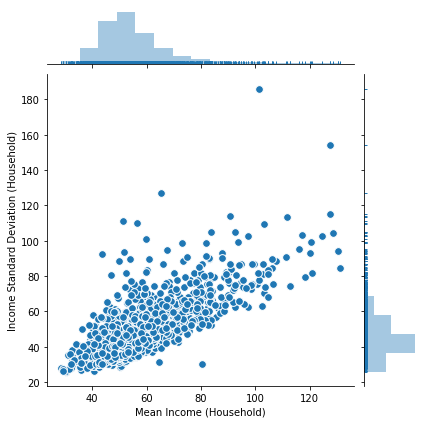

In [10]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Income Standard Deviation (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

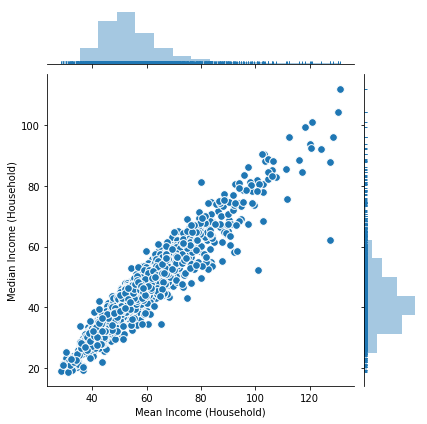

In [11]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Median Income (Household)'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),
...                   s=60, edgecolor="w", linewidth=1)

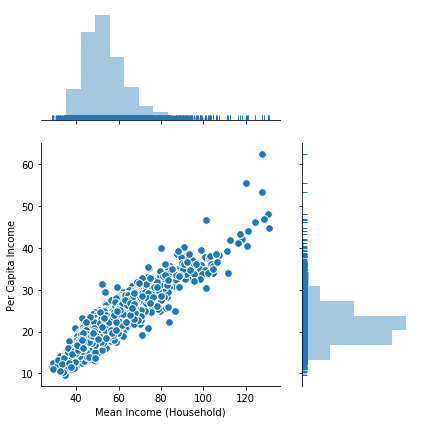

In [12]:
sns.jointplot(x=data['Mean Income (Household)'], y=data['Per Capita Income'],data=data, marginal_kws=dict(bins=15, rug=True),
...                   annot_kws=dict(stat="r"),ratio=2,
...                   s=60, edgecolor="w", linewidth=1)

#### Plotting correlations between similar types of features

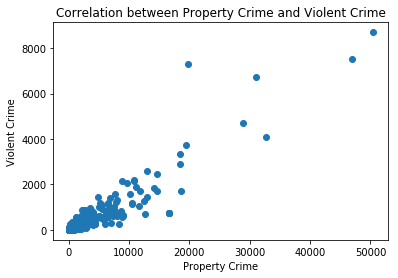

In [13]:
plt.scatter(data['Property Crime'],data['Violent Crime'])  
plt.xlabel('Property Crime')
plt.ylabel('Violent Crime')
plt.title('Correlation between Property Crime and Violent Crime')
plt.show()

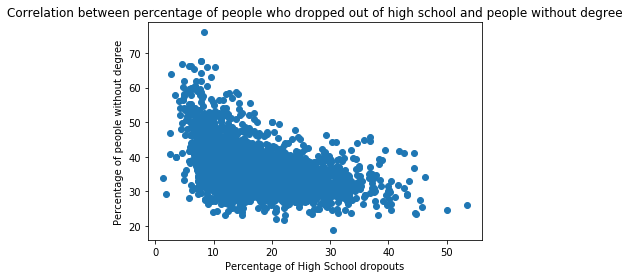

In [14]:
plt.scatter(data['Percent High School Dropouts'],data['Percent No Degree'])  
plt.xlabel('Percentage of High School dropouts')
plt.ylabel('Percentage of people without degree')
plt.title('Correlation between percentage of people who dropped out of high school and people without degree')
plt.show()

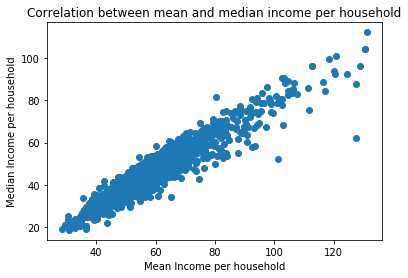

In [15]:
plt.scatter(data['Mean Income (Household)'],data['Median Income (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Median Income per household')
plt.title('Correlation between mean and median income per household')
plt.show()

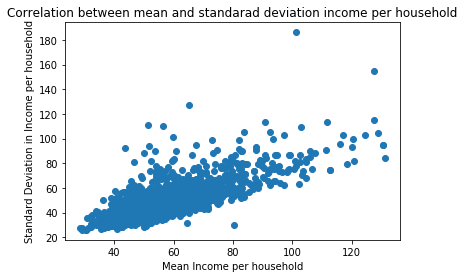

In [16]:
plt.scatter(data['Mean Income (Household)'],data['Income Standard Deviation (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Standard Deviation in Income per household')
plt.title('Correlation between mean and standarad deviation income per household')
plt.show()

#### Plotting correlation between Per Capita Income, Education Level and Total Crime 

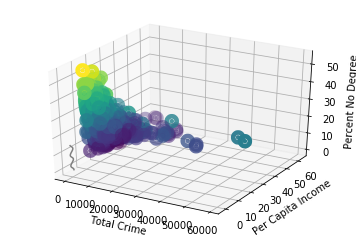

In [17]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent High School Dropouts']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

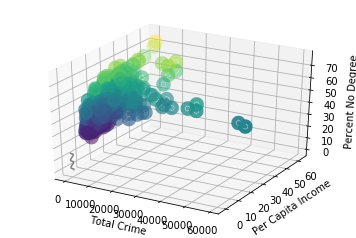

In [18]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent No Degree']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

#### Plotting the correlation matrix using heatmap

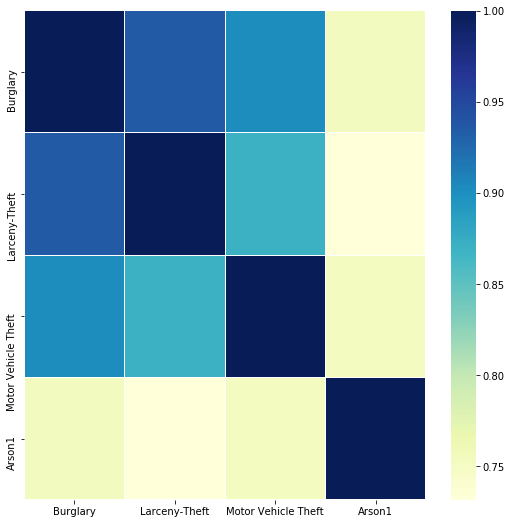

In [19]:
property = reader.get_all_property_crime()
corrprop = property.corr() 
f, ax = plt.subplots(figsize =(9, 9)) 
sns.heatmap(corrprop, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

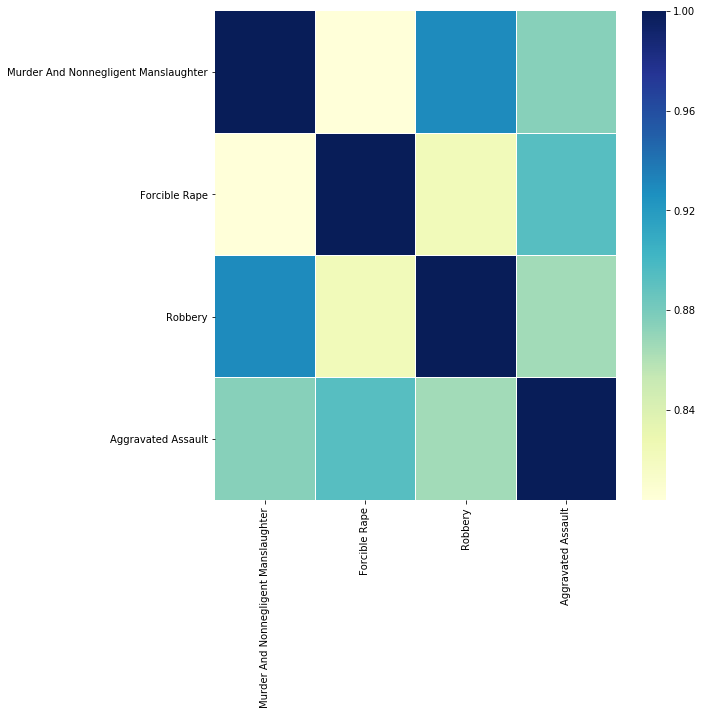

In [20]:
violent = reader.get_all_violent_crime()
corrviol = violent.corr() 
f, ax = plt.subplots(figsize =(9, 9)) 
sns.heatmap(corrviol, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

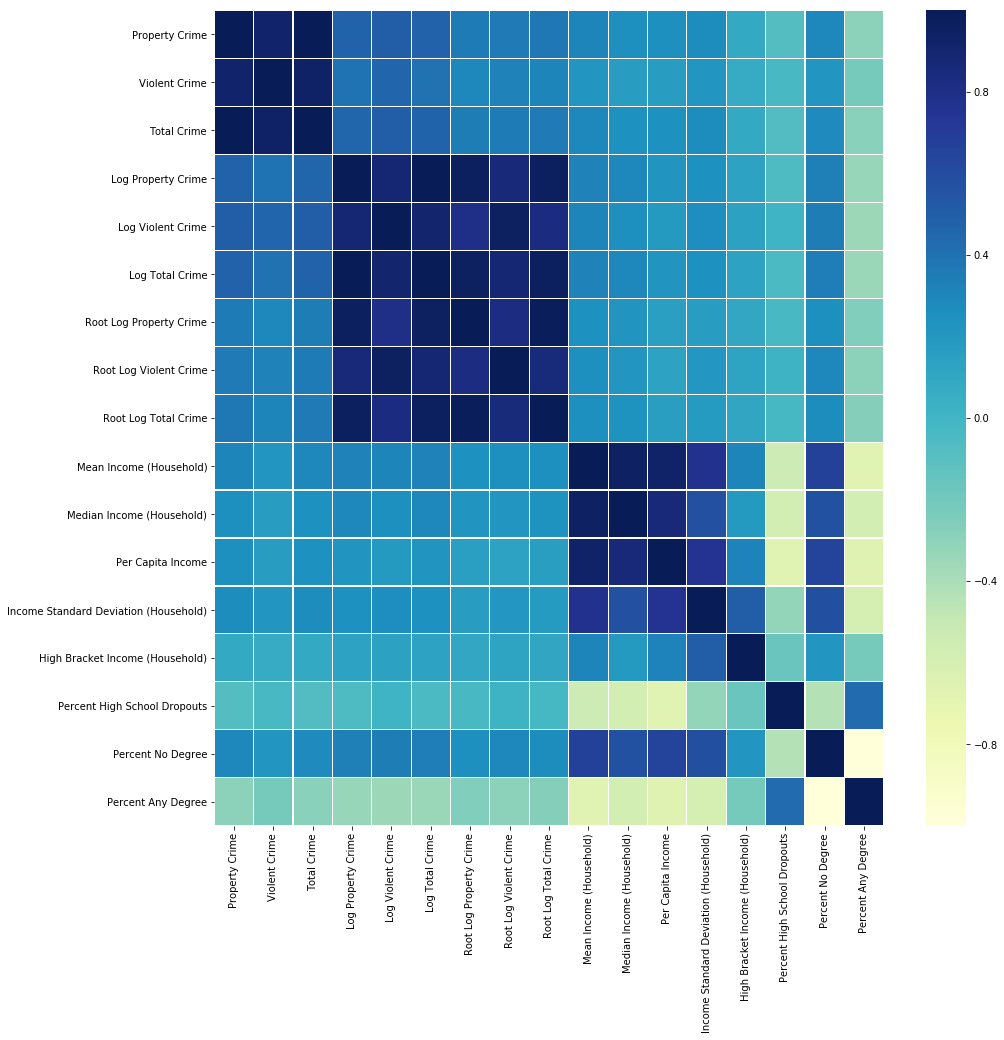

In [21]:
corrmat = data.corr() 

f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

#### Plotting the correlation between features using scatter plot matrix

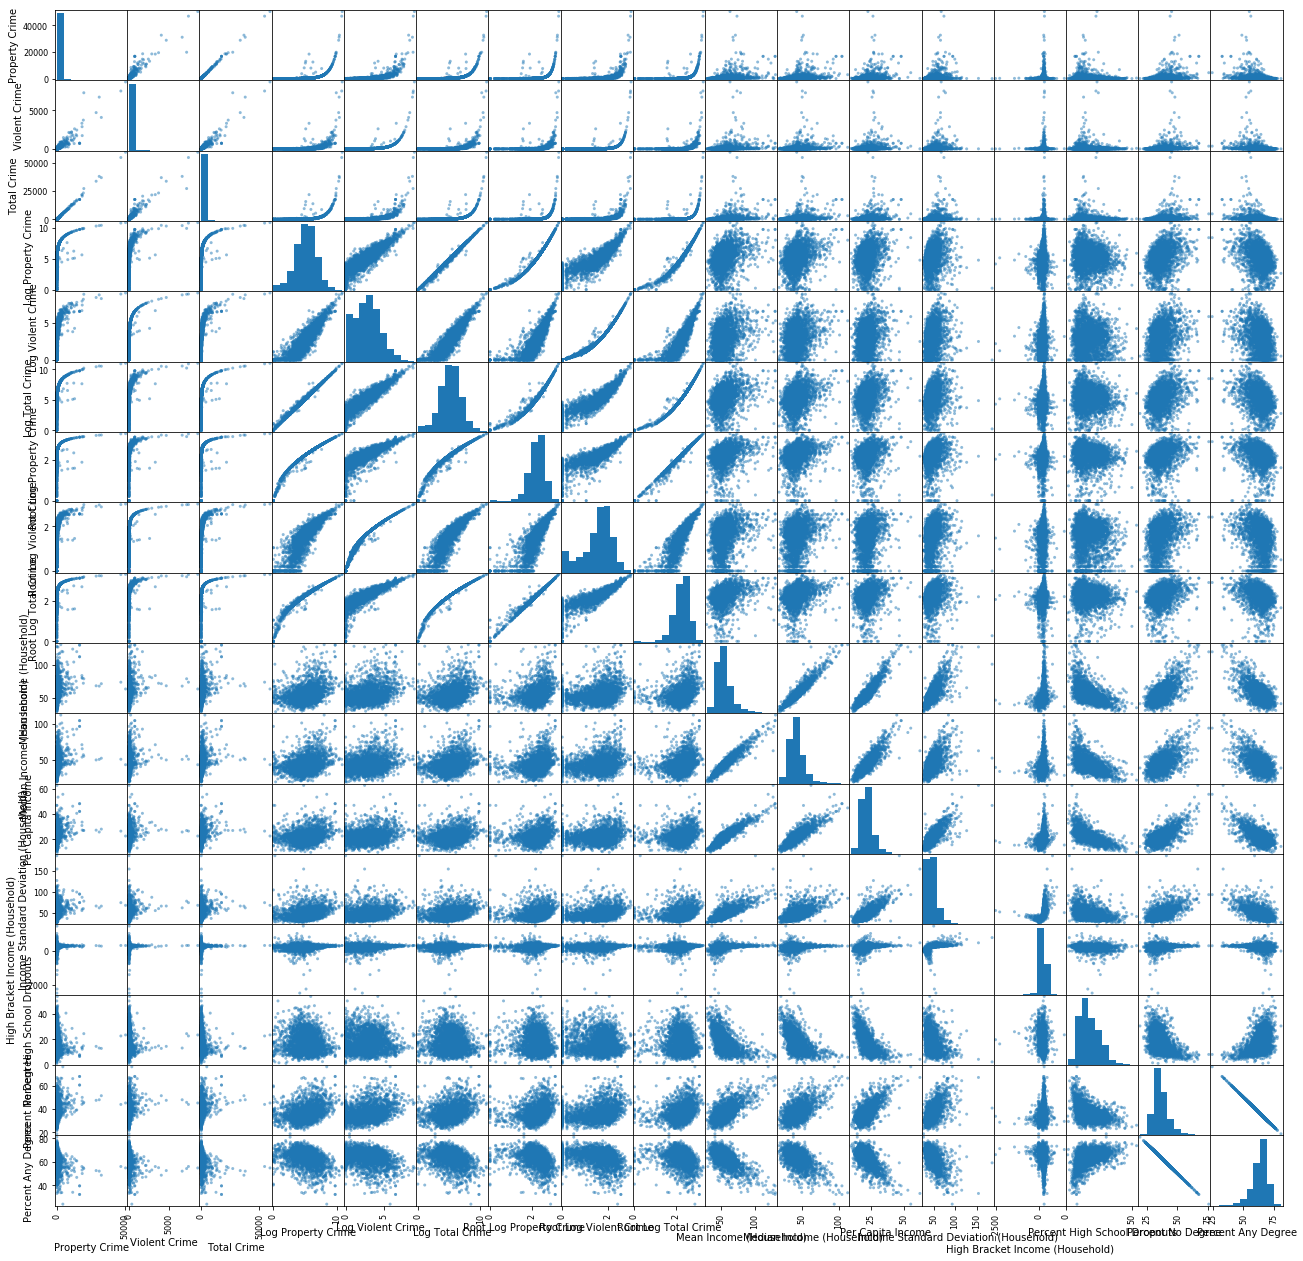

In [22]:
pd.plotting.scatter_matrix(data, figsize=(22, 22))
plt.show()

#### Getting features and label and performing few transformations

In [30]:
from collections import OrderedDict
class Row(object):
    
    def __init__(self):
        self.education_type = None
        self.income_type = None
        self.LinearRegMSE = None
        self.RidgeMSE = None
        self.DicisionTreeMSE = None
        self.KNeighbourMSE = None
        self.SVR_MSE = None
        self.RandomForestMSE = None
        self.BoostingMSE = None

    def toDict(self):
        return {'education_type' : self.education_type,
                'income_type' : self.income_type,
                'LinearRegMSE':  self.LinearRegMSE,
                'RidgeMSE' : self.RidgeMSE,
                'DicisionTreeMSE' : self.DicisionTreeMSE,
                'KNeighbourMSE': self.KNeighbourMSE,
                'SVR_MSE' : self.SVR_MSE,
                'RandomForestMSE': self.RandomForestMSE,
                'BoostingMSE' :self.BoostingMSE
               }

#### Applying models

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings("ignore")

param_grid = {"education_type" :["dropout", "degreeless","degree"], "income_type" :["median", "deviation"]}
result = pd.DataFrame()

for param in list(ParameterGrid(param_grid)):
    row = Row()
    row.education_type = param['education_type']
    row.income_type = param['income_type']
    X = reader.get_features(param['education_type'], param['income_type'])
    y = reader.get_label('total')
    y=np.power(np.log1p(y),1/4)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    
    ## Scale input data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.to_numpy())
    X_test = scaler.fit_transform(X_test.to_numpy())
    
    ## Liner Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred=linreg.predict(X_test)
    row.LinearRegMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Ridge Regression
    ridgereg = Ridge(alpha=1.0)
    ridgereg=ridgereg.fit(X_train,y_train)
    y_pred=ridgereg.predict(X_test)
    row.RidgeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Decision Tree
    regr = DecisionTreeRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.DecisionTreeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Random Forest Tree
    regr = RandomForestRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.RandomForestMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### Boosting
    params = {'n_estimators': 100, 'max_depth': 2}
    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    row.BoostingMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### KNN
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_pred=neigh.predict(X_test)
    row.KNeighbourMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### SVR
    svr = SVR(gamma='auto')
    svr = svr.fit(X_train, y_train.values.ravel())
    y_pred=svr.predict(X_test)
    row.SVR_MSE = metrics.mean_squared_error(y_test, y_pred)
   
    
    result = result.append(row.toDict(), ignore_index=True)

result


,BoostingMSE,DicisionTreeMSE,KNeighbourMSE,LinearRegMSE,RandomForestMSE,RidgeMSE,SVR_MSE,education_type,income_type
0,0.003560,None,0.004480,0.003482,0.003560,0.003482,0.007080,dropout,median
1,0.003591,None,0.005510,0.003588,0.003591,0.003588,0.007199,dropout,deviation
2,0.003619,None,0.005419,0.003544,0.003619,0.003544,0.007021,degreeless,median
3,0.003800,None,0.005753,0.003559,0.003800,0.003559,0.007008,degreeless,deviation
4,0.004062,None,0.005419,0.003544,0.004062,0.003544,0.007021,degree,median
5,0.003595,None,0.005753,0.003559,0.003595,0.003559,0.007008,degree,deviation


In [ ]:
#### SVR Support Vectors

In [52]:
supportVectors = len(svr.support_vectors_)
SV=svr.support_vectors_
print("Number of support vectors : ",supportVectors)
print("")
print("Support Vectors : ", SV)

Number of support vectors :  104

Support Vectors :  [[-1.34958565e+00  1.13499991e+00 -1.60473891e-01]
 [ 4.96898082e-01 -1.04618748e+00 -1.57017092e+00]
 [-2.45495584e+00  9.40867186e-01  4.10268227e-01]
 [ 2.94681171e-01 -9.09101159e-01 -5.66656409e-01]
 [ 6.67844367e-01 -3.07846620e-01 -8.57701574e+00]
 [-1.49963034e-02 -3.38619450e-01 -1.66832560e-01]
 [ 8.99038892e-01  3.57794487e+00  3.10653001e+00]
 [-3.34716952e+00  8.46606949e-01  2.31267235e-01]
 [-1.38843203e+00  8.18545483e-01  3.27998200e-01]
 [ 8.19323517e-01  1.21745407e-01  2.54412664e-01]
 [ 1.13120595e+00 -1.24554724e-01  3.68243412e-01]
 [ 6.78939488e-01 -7.54683299e-01 -2.56229465e-01]
 [ 1.21273296e+00 -8.23636353e-01 -2.03794327e-01]
 [ 1.11624525e+00 -1.26306470e+00 -1.70715695e+00]
 [-6.56490934e-01  1.06329145e+01  3.50881252e+00]
 [ 5.24268136e-01  2.04419894e+00  3.71962867e+00]
 [-5.35411097e-01  1.19841896e+00  1.52178748e-01]
 [ 1.64641731e+00  2.75220051e-01  6.94526620e-01]
 [ 6.71969066e-01 -6.67936603

In [43]:
linreg.coef_

array([[-0.0071503 , -0.00036454,  0.00104877]])